![Daisy world](https://personal.ems.psu.edu/~dmb53/Earth_System_Models/Daisyworld_files/Daisyworld_pict.jpg)
Acknowledgements:
Daisyworld image from PSU, David Bice.
Code was originally based on a python script by Andrew Bennett


Daisy world is a toy model of the planet designed to show how negative feedbacks with the biosphere can lead to a stable planet temperature over a wide range of solar luminosities. It was introduced by Watson and Lovelock(1982, Tellus B) as an example of the Gaia theory, which proposed a solution to the weak young sun paradox. In the early stage of the planet, when life had already established, the sun was about 30\% weaker than today, and yet mean temperatures must have remained within the rough range of 0-40C which allow life to persist. The Gaia theory proposed a negative, "stabilizing feedback", whereby the presence of life reduces temperature variability, thus permitted the continued presence of life.

In response to criticism to the theory, Watson and Lovelock (hereafter WL82) introduced daisy world. Quite simply, a planet is occupied by two species of daisy with different albedos (see figure above), but the same temperature response function where growth is maximized at a certain temperature (22.5C in the paper).  Black daisies are warmer than white due to their lower albedo. 

The model is simple, consisting of two ODEs that describe the evolution of the black and white daisies as a function of the temperature and three diagnostic equations that describe mean albedo of the planet, the resulting mean temperature assuming energy balance, and the local temperatures of the daisy patches, which are a function of the flower albedo.

Before we start we need to import the modules we will need for the code, numpy and matplotlib for the graphics, and we define a few constants.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

keloff=273.15 # to convert between K and deg C 
sigma=5.67e-8 # S-B constant
S0=1000 # solar constant W/m**2
insul=20  # q' in equation 7 of WL82, this relates local albedo perturbations to temperature perturbations
maxloop=100 # number of iterations to allow daisies to equilibrate.
luminosity=np.arange(0.5,1.5,0.01) # range of luminosities over which we will loop, starting from low to high

We now define the plant grown temperature response function.  This is a quadratic curve that peaks at T=22.5C (you may change this value).  

Equation 3 of WL82:
\begin{equation}
\beta=1-0.003265(22.5-T)^2
\end{equation}

The max function ensures positive-definite growth rates, setting the growth rate to zero below about 5C and above 40C.

In [ ]:
Td_ideal=22.5+keloff  # peak growth rate for daisies
birth_rate_k=0.003265 #
death_rate=0.3 # fixed death rate gamma in equation 1
def birth_rate(T):
    """function to calculate birth rate"""
    return max(1.0-birth_rate_k*(Td_ideal-T)**2,0.0)

We now introduce some other parameters in the model, the white daisy (dw) and black daisy (db) and bare soil (bs) albedoes: 



In [2]:
alb_dw=0.75 # white daisies albedo 
alb_db=0.25 # black daisies
alb_bs=0.5  # bare soil 

We now perform the main loop over luminosity, and for each luminosity find the stable solution of daisy area and temperature.

The equations in turn are:

Equation 5 of WL82, this simply states that the mean planetary albedo is an area-weighted average of the daisies and bare soil values. 

\begin{equation}
\alpha_p=A_{dw}\alpha_{dw}+A_{db}\alpha_{db}+A_{bs}\alpha_{bs}
\end{equation}

We then calculate the planet mean temperature:
\begin{equation}
\alpha_p=A_{dw}\alpha_{dw}+A_{db}\alpha_{db}+A_{bs}\alpha_{bs}
\end{equation}

local temperatures
\begin{equation}
\alpha_p=A_{dw}\alpha_{dw}+A_{db}\alpha_{db}+A_{bs}\alpha_{bs}
\end{equation}

birthrate, and then solve the ODEs... note this is not a good solution method as the system is coupled and the intergration method is explicit, but it will do for present purposes. 
\begin{equation}
\alpha_p=A_{dw}\alpha_{dw}+A_{db}\alpha_{db}+A_{bs}\alpha_{bs}
\end{equation}


In [39]:
# store arrays 
area_dw_v=[]
area_db_v=[]
area_bs_v=[]
T_p_v=[]
area_dw=area_db=0.01 # initial conditions

# loop over luminosity...
for iflux,flux in enumerate(luminosity):
    # initial conditions are taken from a previous run, subject to 
    # a minimum of 1% in case the species had died out 
    area_dw=max(area_dw,0.01)   # white daisies can't die out
    area_db=max(area_db,0.01)   # black daises neither  
    area_bs=1.0-area_dw-area_db # bare soil fraction
    it=0
    while it<maxloop:  # can put tolerance to exit earlier if converged...
        it+=1
        
        # EQN 5: calculate weighted average albedo
        alb_p=area_dw*alb_dw+area_db*alb_db+area_bs*alb_bs
        
        # EQN 4: calculate planet mean temperature
        T_p=np.power(flux*S0*(1-alb_p)/sigma,0.25)
        
        # EQN 7: calculate local temperatures
        T_db=insul*(alb_p-alb_db)+T_p
        T_dw=insul*(alb_p-alb_dw)+T_p
       
        # EQN 3: calculate birth rate beta
        birth_rate_db=birth_rate(T_db)
        birth_rate_dw=birth_rate(T_dw)
        
        # EQN 1: change in daisy area
        area_db+=area_db*(birth_rate_db*area_bs-death_rate)
        area_dw+=area_dw*(birth_rate_dw*area_bs-death_rate)
        
        # update areas
        area_bs=1.0-area_db-area_dw

    # store the value...
    area_db_v.append(area_db)
    area_dw_v.append(area_dw)
    area_bs_v.append(area_bs)
    T_p_v.append(T_p)


Now we just need to plot the results:

Text(0,0.5,'Global Temperature (C)')

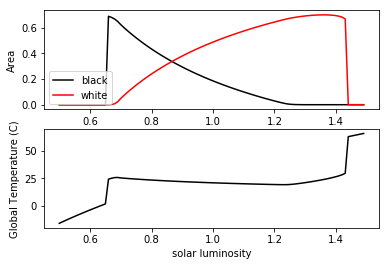

In [40]:
fig,ax=plt.subplots(2,1)
ax[0].plot(luminosity,area_db_v,color='black',label='black')
ax[0].plot(luminosity,area_dw_v,color='red',label='white')
ax[0].set_xlabel('solar luminosity')
ax[0].set_ylabel('Area')
ax[0].legend(loc="best")

ax[1].plot(luminosity,np.array(T_p_v)-keloff,color="black")
ax[1].set_xlabel('solar luminosity')
ax[1].set_ylabel('Global Temperature (C)')


Questions to investigate

1. What happens if you change the albedo values of the black and/or white daisies, or daisy-dependent death rates?

2. What happens if, after arriving at a luminosity $L$ of 1.6 you turn the sun back down again?  (i.e. reverse the luminosity loop). Do the solution branches follow each other exactly?

3. What happens if for each value of luminosity you start from a near bare earth? (1% coverage for each daisy type)  At which values of luminosity does the population crash occur?

4. What happens if you only allow one daisy type? 

5. What happens if you introduce 3 daisy types

6. Watson and Lovelock introduce another experiment in which black daisies are warmer, but they cool the planet by introducing clouds.  This experiment can be conducted by assuming that the TOA albedo for black daisy areas is 0.8, the daises are still warmer than white daisies due to their lower albedo (not very physical!) - See if you can reproduce fig 2 of Watson and Lovelock with this experiment.  What happens to the white daisies?

Have fun and above all, never stop asking yourself "what if?"
